In [ ]:
import os
import json
import pandas as pd

# JSON 파일이 저장된 폴더 경로
folder_path = '/Users/kimseohee/Desktop/Autonomous-Pedestrian-Prediction-with-Talchum-Motion-Data/Data/Data_TL'

# 결과를 저장할 리스트
data = []

# 폴더 내 모든 JSON 파일을 처리
for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            json_data = json.load(file)
            talchum_important = json_data.get('Talchum_info', {}).get('Talchum_important', '정보 없음')
            data.append({"File Name": file_name, "Talchum Important": talchum_important})

# DataFrame 생성
Talchum_important_df = pd.DataFrame(data)

# 결과 확인
display(Talchum_important_df)

,File Name,Talchum Important
0,MC01_A02_B031_CA1_M0005_2925.json,곰방대와 부채로 너울질 하는 춤
1,MC01_A09_B099_CA1_M0007_3870.json,"돌림사위, 울음태사위"
2,MC01_A06_B081_CA1_M0001_1845.json,북채를 떨어 뜨린다\n북을 잡으려다 놓치고 운다\n결국 북을 쥐고 신나게 춤을춘다
3,MC01_A04_B055_CA1_M0008_11100.json,"합장재배, 벽사진경의 의식무로서 연희초반 마당을 정화하는 대표적 동작"
4,MC01_A03_B049_CA1_M0014_25290.json,엎드려서 좌.우를 느리게 보는 동작
...,...,...
33200,MC01_A01_B004_CA1_M0004_5295.json,홍태기가 툭 덜어지는 맛으로 춤을 춘다
33201,MC01_A06_B082_CA1_M0009_4470.json,"첫 입장 배김새, 큰 배김새"
33202,MC01_A01_B014_CA1_M0004_1550.json,돌며 뿌리는 동작
33203,MC01_A03_B045_CA1_M0008_4170.json,왼쪽으로 높이 뛰어 2번 도는사위


In [4]:

Talchum_important_df.to_csv('extracted_talchum_important.csv', index=False, encoding='utf-8-sig')

In [5]:
print(Talchum_important_df.columns)

Index(['File Name', 'Talchum Important'], dtype='object')


/Users/kimseohee/Desktop/Autonomous-Pedestrian-Prediction-with-Talchum-Motion-Data/venv/lib/python3.11/site-packages/soynlp/tokenizer/_tokenizer.py:19: FutureWarning: Possible nested set at position 13
  ('english & latin', re.compile(u"[a-zA-ZÀ-ÿ]+[[`']?s]*|[a-zA-ZÀ-ÿ]+", re.UNICODE))


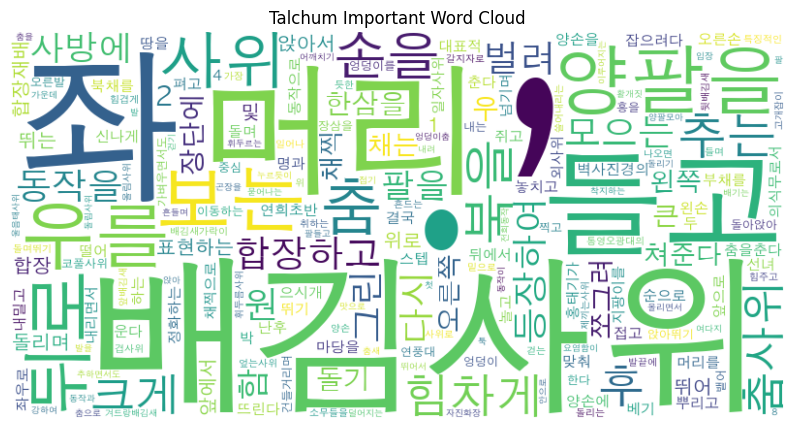

In [6]:
from soynlp.tokenizer import RegexTokenizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 데이터 준비
text_data = Talchum_important_df['Talchum Important'].dropna().tolist()
text = " ".join(text_data)

# 토큰화
tokenizer = RegexTokenizer()
tokens = tokenizer.tokenize(text)

# 불용어 제거
stopwords = ["는", "의", "를", "에", "로", "도", "다","동작", "배김새", "느리게", "엎드려서"]

tokens = [word for word in tokens if word not in stopwords]

# 단어 빈도 계산
word_freq = Counter(tokens)

# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path='/Library/Fonts/AppleGothic.ttf',  # MacOS 폰트 경로
    background_color='white',
    width=800,
    height=400,
    colormap='viridis'
).generate_from_frequencies(word_freq)

# 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Talchum Important Word Cloud")
plt.show()


In [9]:
# 전체 단어 수 계산
total_words = sum(word_freq.values())

# 단어 비율 계산
word_percentage = {word: (freq / total_words) * 100 for word, freq in word_freq.items()}

# 상위 5개 단어와 비율 정렬 및 출력
top_5_words = sorted(word_percentage.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Words with Percentages:")
for word, percentage in top_5_words:
    print(f"{word}: {percentage:.2f}%")


Top 10 Words with Percentages:
,: 10.25%
.: 6.64%
배김사위: 1.28%
좌: 1.23%
머리: 0.91%
들고: 0.75%
양팔을: 0.75%
우를: 0.72%
보는: 0.72%
뒤로: 0.71%


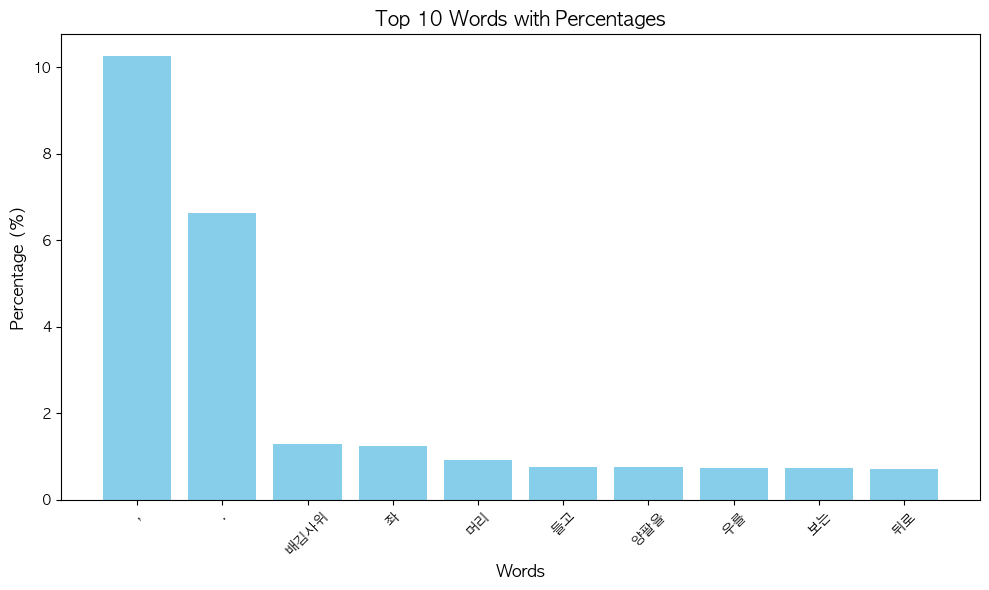

In [19]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

rc("font", family="AppleGothic")  
plt.rcParams["axes.unicode_minus"] = False 


words = [",", ".", "배김사위", "좌", "머리", "들고", "양팔을", "우를", "보는", "뒤로"]
percentages = [10.25, 6.64, 1.28, 1.23, 0.91, 0.75, 0.75, 0.72, 0.72, 0.71]


plt.figure(figsize=(10, 6))
plt.bar(words, percentages, color="skyblue")
plt.xlabel("Words", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Top 10 Words with Percentages", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

plt.show()


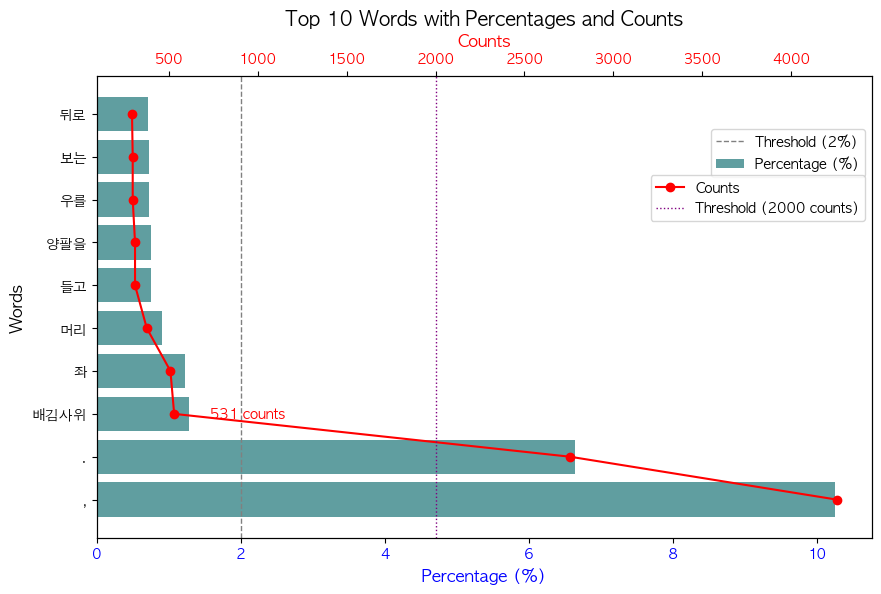

In [52]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


rc("font", family="AppleGothic")  
plt.rcParams["axes.unicode_minus"] = False  


words = [",", ".", "배김사위", "좌", "머리", "들고", "양팔을", "우를", "보는", "뒤로"]
percentages = [10.25, 6.64, 1.28, 1.23, 0.91, 0.75, 0.75, 0.72, 0.72, 0.71]
counts = [int(41507 * (p / 100)) for p in percentages]  # 비율 기반 노출 횟수 계산

# 가로 막대 그래프 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# 가로 막대 그래프 (비율)
ax1.barh(words, percentages, color="#609ea0", label="Percentage (%)")  
ax1.set_ylabel("Words", fontsize=12)
ax1.set_xlabel("Percentage (%)", fontsize=12, color="blue")
ax1.tick_params(axis="x", labelcolor="blue")
ax1.set_title("Top 10 Words with Percentages and Counts", fontsize=14)

# 꺾은 선 그래프 (노출 횟수)
ax2 = ax1.twiny()  
ax2.plot(counts, words, color="red", marker="o", label="Counts")  
ax2.set_xlabel("Counts", fontsize=12, color="red")
ax2.tick_params(axis="x", labelcolor="red")


index_baegim = words.index("배김사위")
ax2.text(
    counts[index_baegim] + 200, index_baegim,  
    f"{counts[index_baegim]} counts",
    color="red", fontsize=10, va="center"
)

# 보조선 추가
ax1.axvline(x=2, color="gray", linestyle="--", linewidth=1, label="Threshold (2%)")  # 비율 보조선
ax2.axvline(x=2000, color="purple", linestyle=":", linewidth=1, label="Threshold (2000 counts)")  # 노출 횟수 보조선

# 범례를 위아래로 나눠 배치
ax1.legend(loc="upper right", fontsize=10, frameon=True, bbox_to_anchor=(1, 0.9))  
ax2.legend(loc="upper right", fontsize=10, frameon=True, bbox_to_anchor=(1, 0.8))  

plt.show()


In [53]:
# "배김사위"라는 표현이 포함된 행 필터링
baegimsawe_filtered_df = Talchum_important_df[Talchum_important_df['Talchum Important'].str.contains("배김사위", na=False)]

display(baegimsawe_filtered_df)

,File Name,Talchum Important
13,MC01_A07_B088_CA1_M0025_8095.json,"코풀사위, 배김사위, 배김새가락이 나오면 추는 사위로 통영오광대의 가장 특징적인 사위."
28,MC01_A09_B094_CA1_M0009_4575.json,"배김사위, 앞배김새, 뒷배김새, 겨드랑배김새 동작이 강하여 뛰어서 땅을 내려 누르듯..."
32,MC01_A09_B094_CA1_M0005_2370.json,"배김사위, 앞배김새, 뒷배김새, 겨드랑배김새 동작이 강하여 뛰어서 땅을 내려 누르듯..."
42,MC01_A09_B094_CA1_M0006_2775.json,"배김사위, 앞배김새, 뒷배김새, 겨드랑배김새 동작이 강하여 뛰어서 땅을 내려 누르듯..."
44,MC01_A09_B096_CA1_M0009_7590.json,"배김사위, 휘두름사위."
...,...,...
33176,MC01_A09_B100_CA1_M0008_7950.json,배김사위 전희동작 좌.우 활개짓 동작과 배기는 사위
33177,MC01_A09_B095_CA1_M0006_3825.json,"역동새, 배김사위, 일자사위."
33185,MC01_A09_B098_CA1_M0001_1455.json,"배김사위, 할멈 및 제대각시와의 대무. 일자사위"
33187,MC01_A09_B095_CA1_M0004_2400.json,"역동새, 배김사위, 일자사위."
